# Ecuación de calor

## 1 dimensión

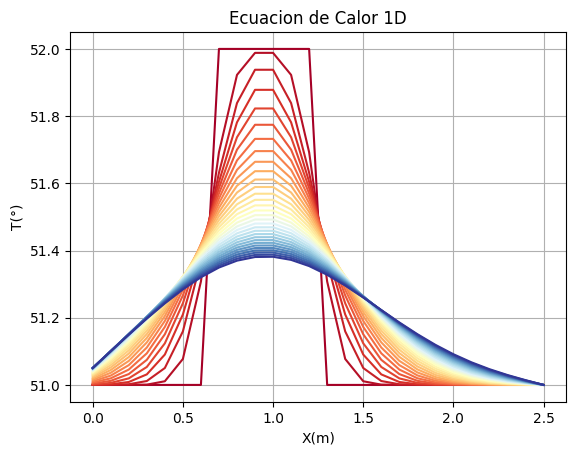

In [ ]:
import numpy as np

def diffusion(nt, nx, tmax, xmax, nu):
   """
   Returns the velocity field and distance for 1D linear convection
   """
   # Increments
   dt = tmax/(nt-1)
   dx = xmax/(nx-1)

   # Initialise data structures
   import numpy as np
   u = np.zeros((nx,nt))
   x = np.zeros(nx)

   # Boundary conditions
   u[0,:] = u[nx-1,:] = 1

   # Initial conditions
   for i in range(1,nx-1):
      if(i > (nx-1)/4 and i < (nx-1)/2):
         u[i,0] = 2
      else:
         u[i,0] = 1

   # Loop
   for n in range(0,nt-1):
      for i in range(0,nx-1):
         u[i,n+1] = u[i,n] + nu*(dt/dx**2.0)*(u[i+1,n]-2.0*u[i,n]+u[i-1,n])

   # X Loop
   for i in range(0,nx):
      x[i] = i*dx

   return u, x

def plot_diffusion(u,x,u1, nt,title):
   """
   Plots the 1D velocity field
   """

   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   plt.figure()
   colour=iter(cm.RdYlBu(np.linspace(0,5,nt)))
   for i in range(0,nt,5):
      c=next(colour)
      img= plt.plot(x,u[:,i]+u1,c=c)
   plt.xlabel('X(m)')
   plt.ylabel('T(°)')
   plt.title(title)
   plt.grid(True)
   plt.show()

nt = 151
nx = 26
tmax = 1.2
xmax = 2.5
nu = 0.15
u1 = 50
u,x = diffusion(nt, nx, tmax, xmax, nu)
plot_diffusion(u,x, u1, nt, 'Ecuacion de Calor 1D')

## animación de perfil

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2D heat equation solver


NameError: ignored

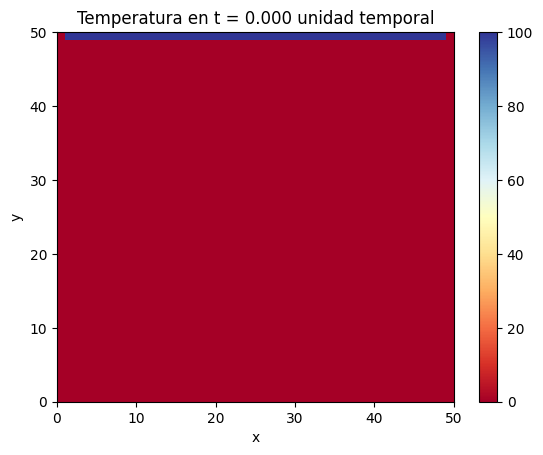

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from google.colab import drive         # tell colab to look at google drive
drive.mount('/content/drive')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

print("2D heat equation solver")

plate_length = 50
max_iter_time = 750

alpha = 2
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0

# Boundary conditions
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperatura en t = {k*delta_t:.3f} unidad temporal")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.RdYlBu, vmin=0, vmax=100)
    plt.colorbar()

    return plt

# Do the calculation here
u = calculate(u)

def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim
anim.save("heat_equation_solution.gif")


## 2 dimensiones

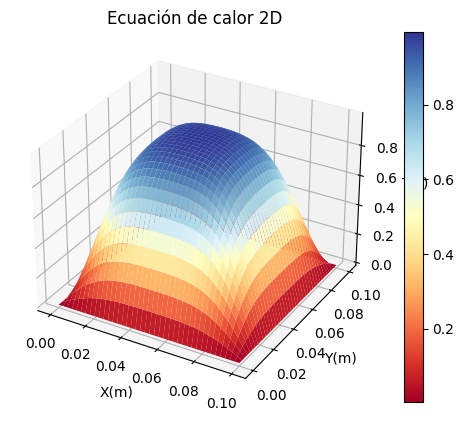

In [ ]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

k = 1.172E-5 # steel, 1% carbon
Lx = 0.1
Ly = 0.1


nx = 40 # number of points in x direction
ny = 40 # number of points in y direction
dt = 0.1 # time step
tf = 10 # final time


T0=1
T1=0
T2=0
T3=0
T4=0


dx = Lx/nx
dy = Ly/ny


r1 = k*dt/(dx**2)
r2 = k*dt/(dy**2)

if (r1 > 0.5 or r2 > 0.5):
	raise TypeError('Unstable Solution!')

T = np.zeros((nx,ny,int(tf/dt)))

# Initial condition
for i in range(0,nx-1):
	for j in range(1,ny-1):
		T[i,j,0] = T0


for i in range(0,nx):
	T[i,0,0]=T1
	T[i,ny-1,0]=T2

for j in range(0,ny):
	T[0,j,0]=T3
	T[nx-1,j,0]=T4


X = np.linspace(0, Lx, nx, endpoint=True)
Y = np.linspace(0, Ly, ny, endpoint=True)
X, Y = np.meshgrid(X, Y)


for t in range (0,int(tf/dt)-1):
	for i in range(1,(nx-1)):
		for j in range (1,(ny-1)):
			a=(T[i+1,j,t]-2*T[i,j,t]+T[i-1,j,t])/dx**2 # d2dx2
			b=(T[i,j+1,t]-2*T[i,j,t]+T[i,j-1,t])/dy**2 # d2dy2
			T[i,j,t+1]=k*dt*(a+b)+T[i,j,t]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
img = ax.plot_surface(X, Y, T[:,:,int(tf/dt)-1], cmap = 'RdYlBu', edgecolor = 'none')
ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')
ax.set_zlabel('T(°)')
plt.title('Ecuación de calor 2D')
fig.colorbar(img)
plt.show()

## 3 dimensiones

ix [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]
iy [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
iz [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]


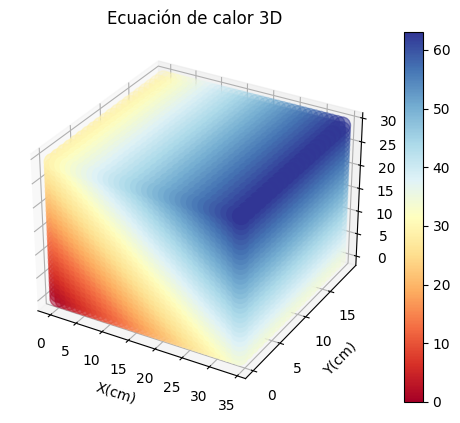

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def get_grid(mx, my, mz, Lx,Ly,Lz):
    ix, iy, iz = Lx*np.linspace(0,1,mx), Ly*np.linspace(0,1,my), Lz*np.linspace(0,1,mz)
    x, y, z = np.meshgrid(ix,iy,iz, indexing='ij')
    print('ix', ix), print('iy', iy), print('iz', iz)
    return x,y,z

def plot_grid(x,y,z,T):
    def plot_boundary_only(x,y,z,T):
        mx, my, mz = x.shape
        x[1:-1, 1:-1, 1:-1],y[1:-1, 1:-1, 1:-1],z[1:-1, 1:-1, 1:-1],T[1:-1, 1:-1, 1:-1] = np.nan, np.nan, np.nan, np.nan
        x[1:-1, 1:,0], y[1:-1, 1:,0], z[1:-1, 1:,0],  T[1:-1, 1:,0] = np.nan, np.nan, np.nan, np.nan
        x[1:-1, my-1, 1:-1], y[1:-1, my-1, 1:-1], z[1:-1, my-1, 1:-1], T[1:-1, my-1, 1:-1] = np.nan, np.nan, np.nan, np.nan
        x[0, 1:, :-1], y[0, 1:, :-1], z[0, 1:, :-1], T[0, 1:, :-1] = np.nan, np.nan, np.nan, np.nan
        return x,y,z,T

    x,y,z,T = plot_boundary_only(x,y,z,T)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    color_map = plt.get_cmap('RdYlBu')
    img = ax.scatter(x,y,z, c=T.reshape(-1), s=150, cmap=color_map)
    fig.colorbar(img)

    #ax.zaxis.set_rotate_label(False)
    ax.set_ylabel('Y(cm)')
    ax.set_xlabel('X(cm)', rotation=0)
    ax.set_zlabel('Z(cm)', rotation=0)
    plt.savefig("cube.png")
    plt.title('Ecuación de calor 3D')
    plt.show()

def init_T(x,y,z):
    T = np.zeros_like(x)
    case = 'xz'
    if case == 'x': T = x
    if case == 'y': T = y
    if case == 'z': T = z
    if case == 'xz': T = x+z
    return T

nx, ny, nz = 35, 20, 30
Lx, Ly, Lz = nx-1, ny-1, nz-1
x,y,z = get_grid(nx, ny, nz, Lx,Ly,Lz)
T = init_T(x,y,z)
plot_grid(x,y,z,T)